In [1]:
import os
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
years  = ["2016_3082","2017_3083","2018_3084","2019_3085","2020_3086","2021_3087"]

folderheader = "5841834/Kelmarsh_SCADA_"
turbine_data_header = "/Turbine_Data_Kelmarsh"
status_header = "/Status_Kelmarsh"

In [3]:
years  = ["2016_3082","2017_3083","2018_3084","2019_3085","2020_3086","2021_3087"]

folderheader = "5841834/Kelmarsh_SCADA_"
turbine_data_header = "/Turbine_Data_Kelmarsh"
status_header = "/Status_Kelmarsh"

def process_files(years, folderheader, keyword):
    dataframes = []
    for year in years:
        # List all files in the directory for the given year
        files = os.listdir(folderheader + year)
        # Filter files based on the keyword
        filtered_files = [file for file in files if keyword in file]
        
        for filename in filtered_files:
            # Extract the turbine number from the filename
            turbine_number = filename.split('_')[-5]
            # Construct the full file path
            filepath = os.path.join(folderheader+year, filename)
            # Read the CSV file
            df = pd.read_csv(filepath, header=9)
            # Add a column for the turbine number
            df['Turbine'] = turbine_number
            # Append the dataframe to the list
            dataframes.append(df)
    
    # Concatenate all dataframes into one and reset the index
    return pd.concat(dataframes, ignore_index=True)

# Usage

status_df = process_files(years, folderheader, 'Status')
turbine_df = process_files(years, folderheader, 'Turbine')

In [4]:
status_df['Timestamp start'] = pd.to_datetime(status_df['Timestamp start'])
turbine_df["# Date and time"] = pd.to_datetime(turbine_df["# Date and time"])


In [5]:
relevant_errors = ["Pitch run-away (hub box v.>=4)",
"Frequency converter error",
"Overload generator fan 1"]


In [6]:
fc_errors = status_df[status_df["Message"]=="Frequency converter error"].loc[:,["Timestamp start", "Turbine"]].reset_index()

In [7]:
#time_frequency_converter_error = "2017-11-11 20:05:53"
#turbine = "6"
# wind direction fluctuations detected (about 2 weeks before)

time_frequency_converter_error = "2018-11-02 17:58:41"
turbine = "4"
# wind direction fluctuations detected (about 2 weeks before)


#time_frequency_converter_error = "2020-08-21 07:00:30"
#turbine = "4"
# wind direction fluctuations detected (about 2 weeks before)
# wind direction maximum fluctuation seems a good feature


fc_errors_turbine = fc_errors[fc_errors["Turbine"]==turbine]["Timestamp start"]


In [8]:
def remove_duplicates_based_on_date_and_turbine(df, timestamp_col, turbine_id_col):
    """
    Remove duplicates from a DataFrame based on the same day and turbine identifier.

    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    timestamp_col (str): The name of the column containing timestamp data.
    turbine_id_col (str): The name of the column containing turbine identifiers.

    Returns:
    pd.DataFrame: A DataFrame with duplicates removed based on day and turbine identifier.
    """

    # Ensure the timestamp column is in datetime format
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])

    # Extract the date from the timestamp
    df['date'] = df[timestamp_col].dt.date

    # Drop duplicates based on 'date' and turbine identifier
    df_unique = df.drop_duplicates(subset=['date', turbine_id_col])

    # Optionally, drop the 'date' column if no longer needed
    df_unique = df_unique.drop(columns=['date'])

    return df_unique


fc_errors = remove_duplicates_based_on_date_and_turbine(fc_errors, "Timestamp start", "Turbine")

In [9]:
fc_errors

,index,Timestamp start,Turbine
0,70,2016-01-29 10:08:33,2
1,77,2016-01-30 07:33:38,2
2,81,2016-02-01 18:43:27,2
3,83,2016-02-02 16:04:36,2
5,1892,2016-02-14 11:12:49,3
6,4730,2016-02-22 13:18:07,6
7,4757,2016-02-23 19:49:02,6
8,7920,2016-02-04 20:03:42,5
9,7921,2016-02-05 07:39:46,5
11,10012,2016-01-24 16:51:17,1


In [10]:
import pandas as pd
import numpy as np

def select_random_time(df, datetime_col):
    """
    Select a random datetime from a DataFrame column, excluding the first and last 100 days.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the datetime data.
    datetime_col (str): The column name containing datetime data.
    
    Returns:
    datetime: A random datetime value from the DataFrame, excluding the first and last 100 days.
    """
    # Convert the datetime column to datetime type if not already
    df[datetime_col] = pd.to_datetime(df[datetime_col])

    # Sort the DataFrame by the datetime column
    df_sorted = df.sort_values(by=datetime_col)

    # Determine the dates to exclude
    start_date = df_sorted[datetime_col].iloc[0] + pd.Timedelta(days=100)
    end_date = df_sorted[datetime_col].iloc[-1] - pd.Timedelta(days=100)

    # Filter the DataFrame to exclude the first and last 100 days
    df_filtered = df_sorted[(df_sorted[datetime_col] >= start_date) & (df_sorted[datetime_col] <= end_date)]

    # Select a random datetime from the filtered DataFrame
    if not df_filtered.empty:
        random_time = np.random.choice(df_filtered[datetime_col])
        return random_time
    else:
        return None  # In case the filtered DataFrame is empty

# Example usage:
# Assuming turbine_df is your DataFrame and "# Date and time" is the column with datetime data.
# random_datetime = select_random_time(turbine_df, "# Date and time")
# print("Random datetime selected:", random_datetime)


/var/folders/4y/3ynvczrn5fldxkh3r7m_fh8r0000gn/T/ipykernel_68311/295359470.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))  # Set the figure size


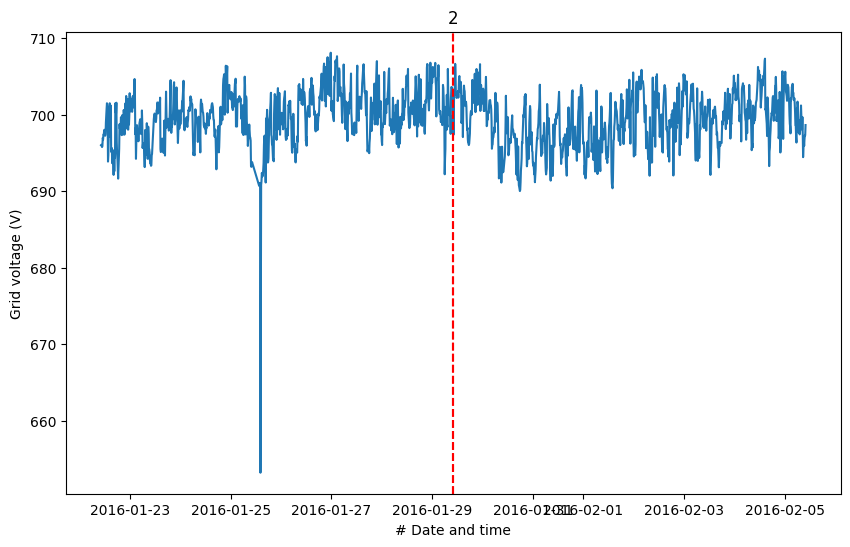

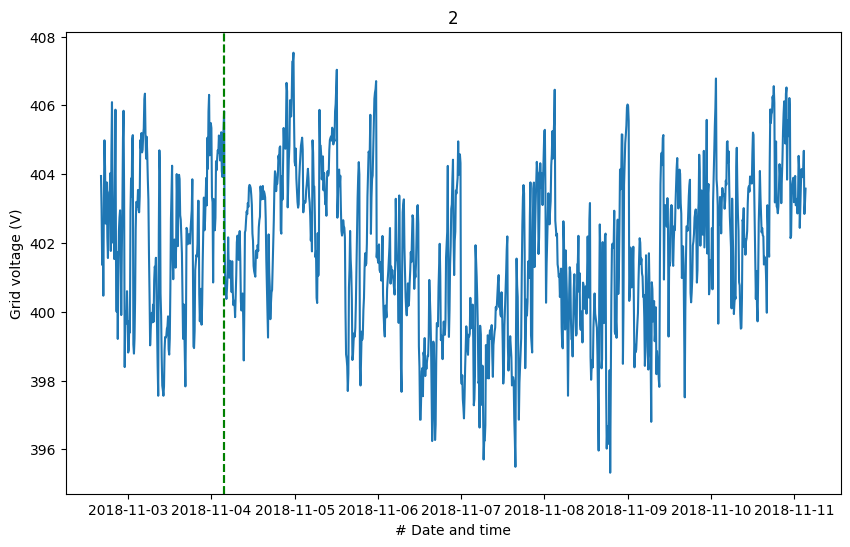

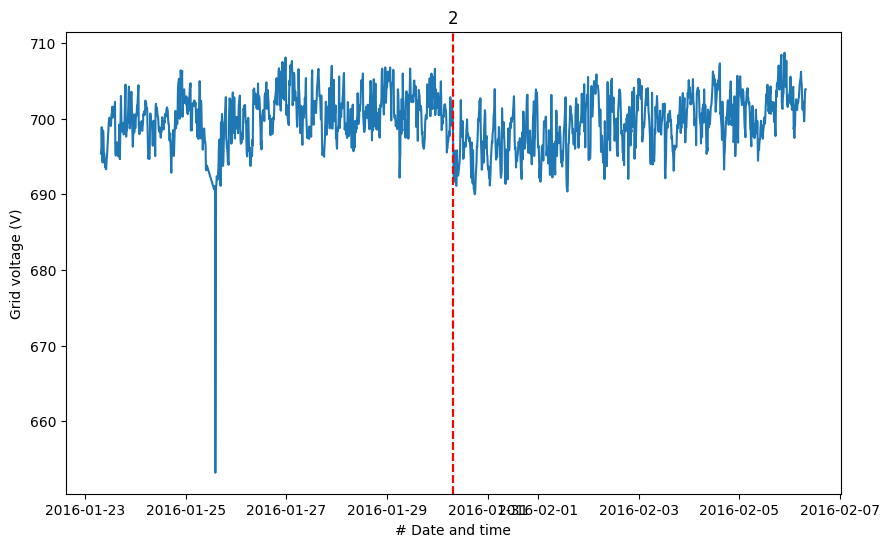

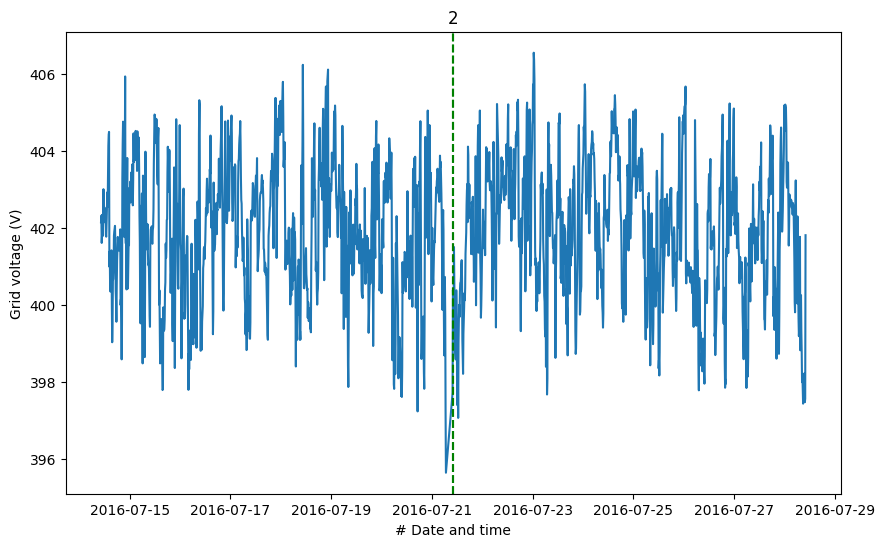

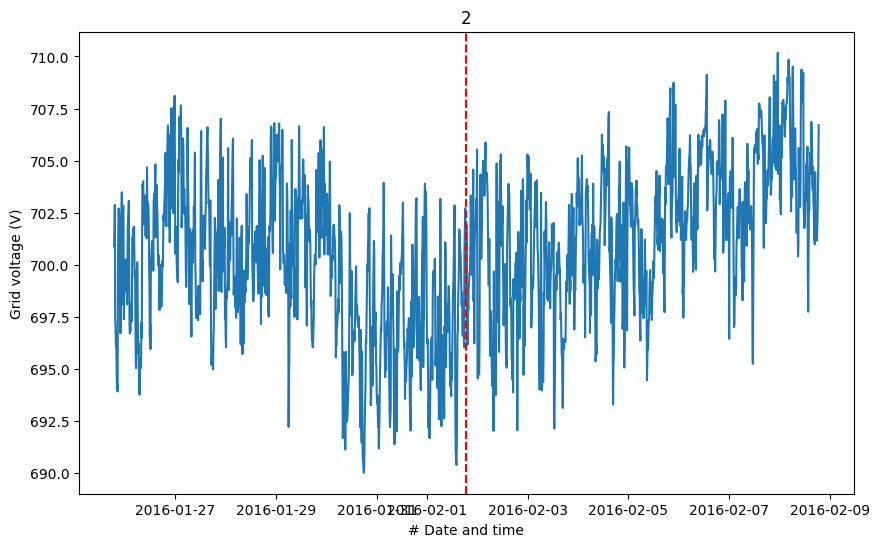

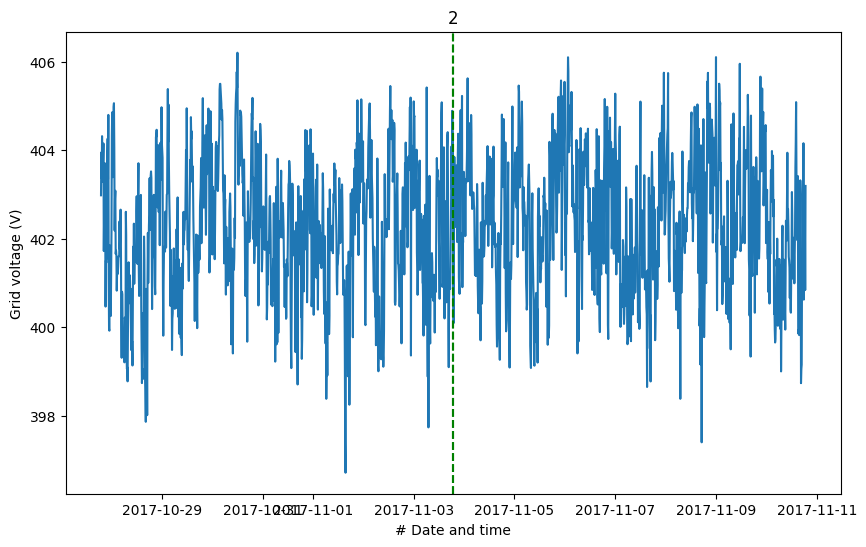

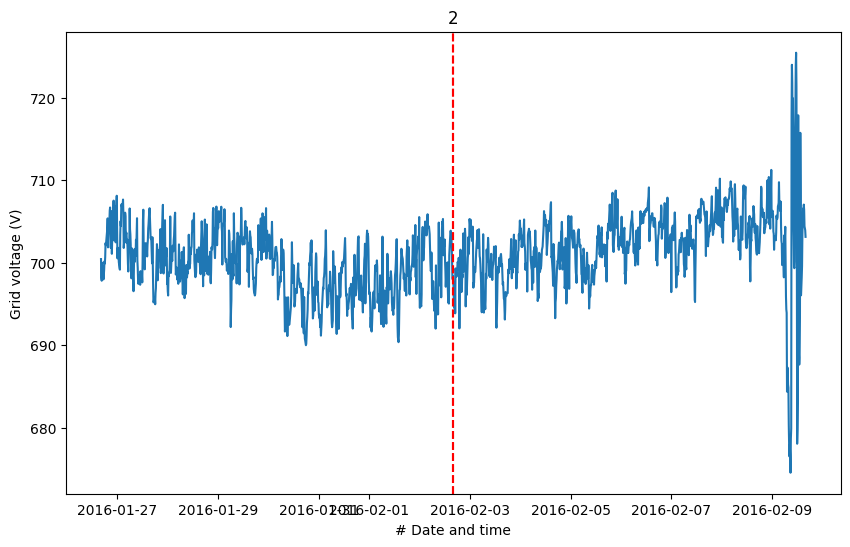

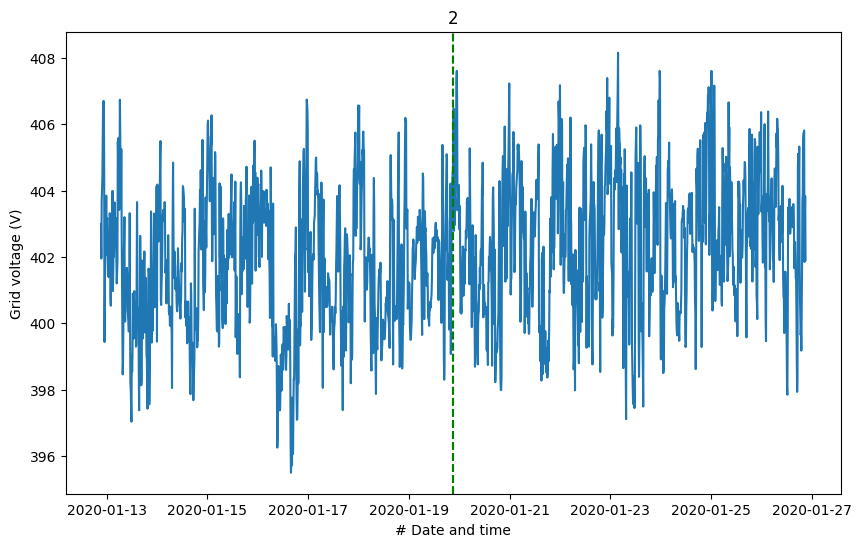

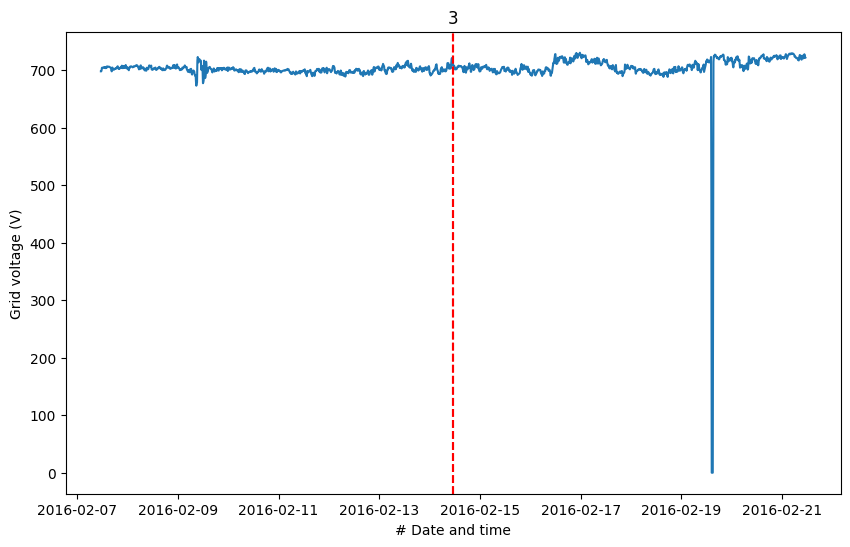

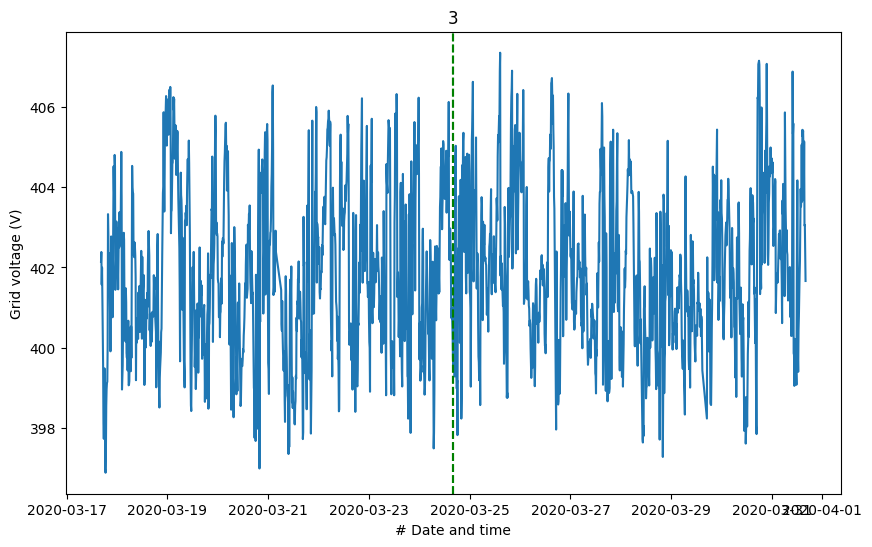

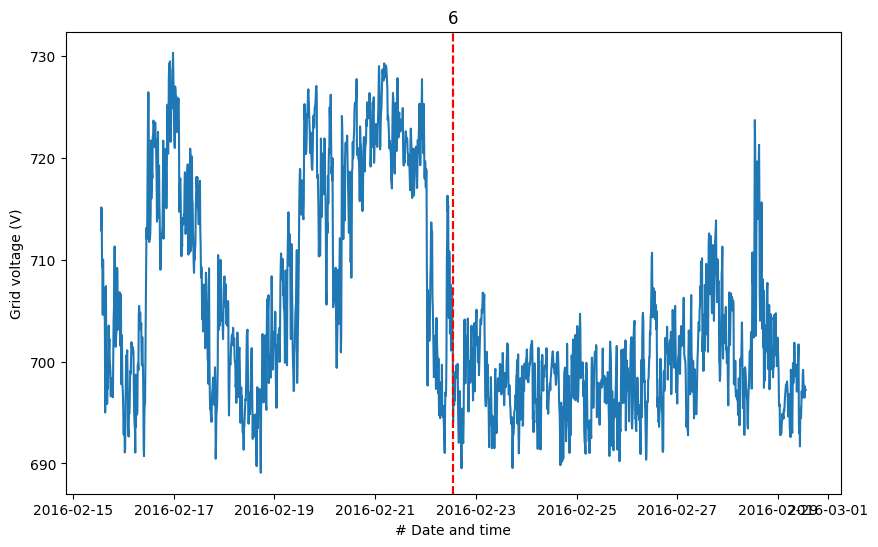

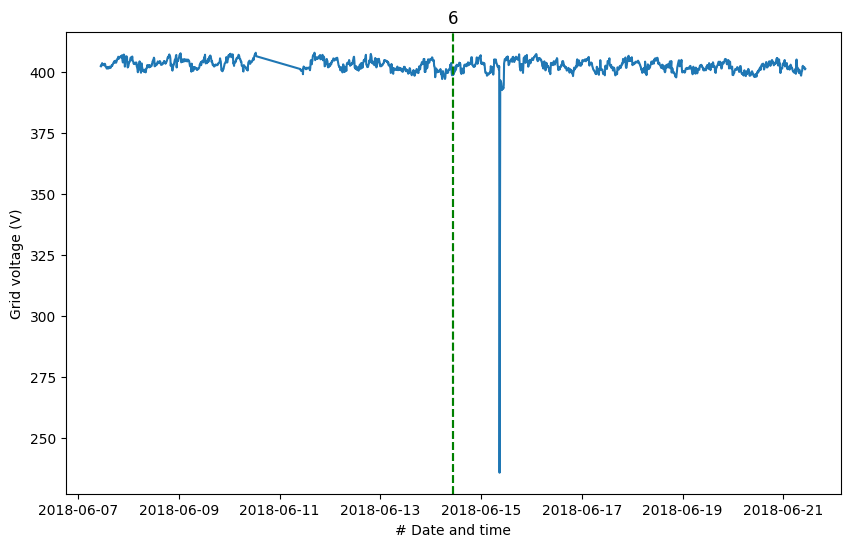

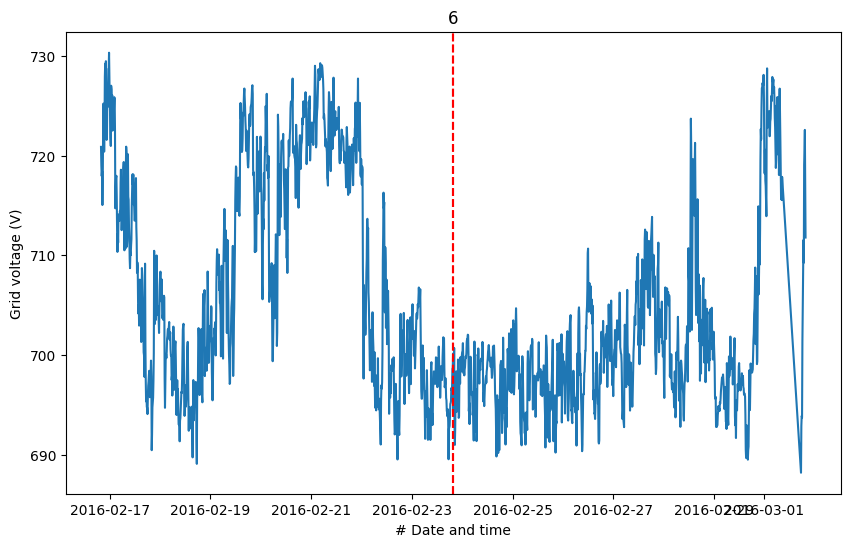

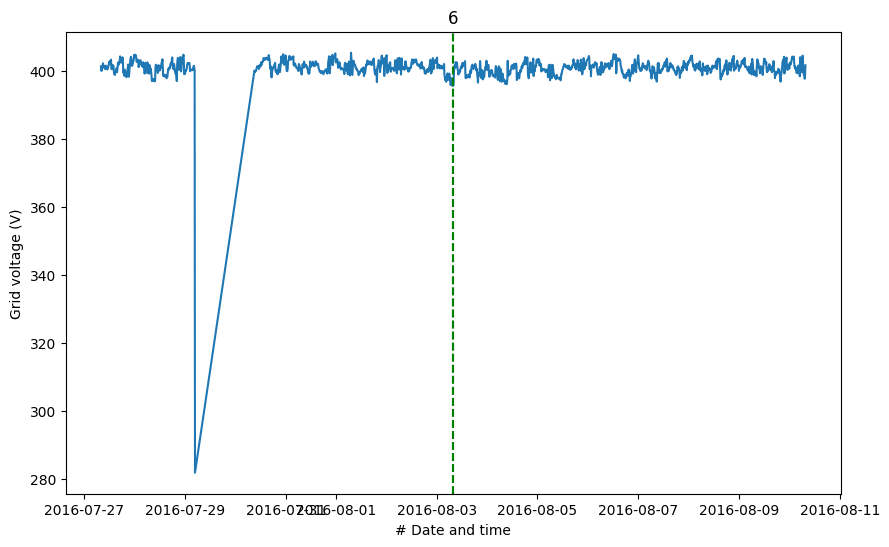

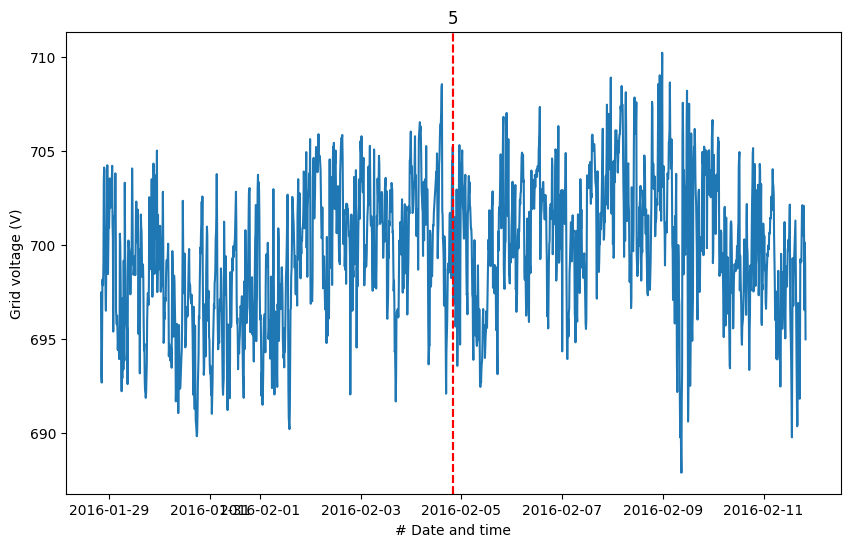

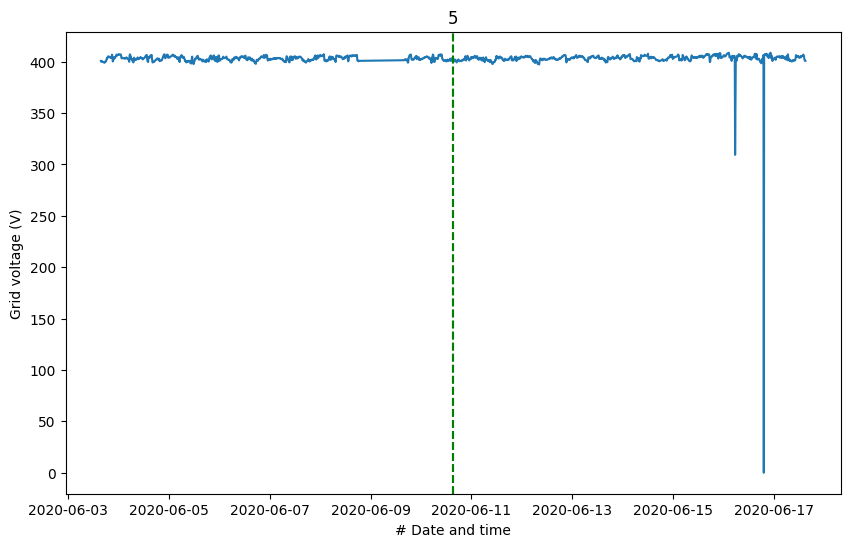

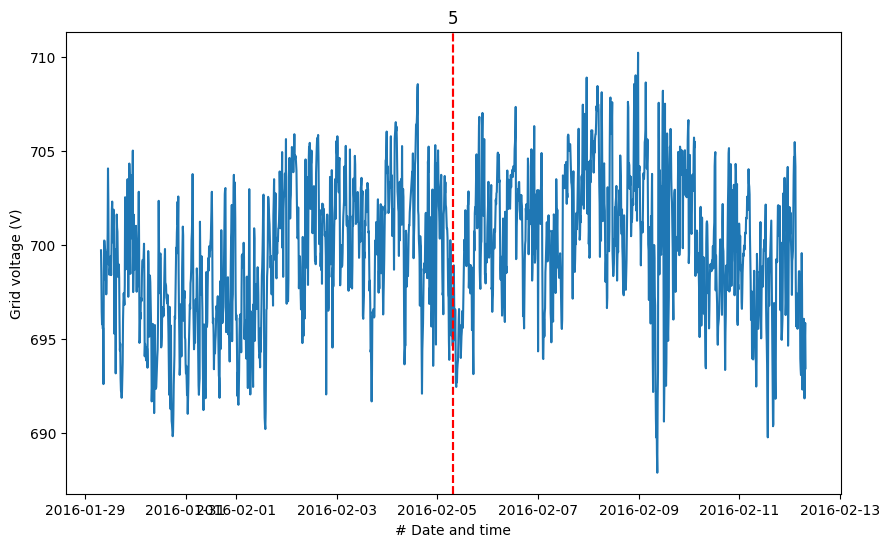

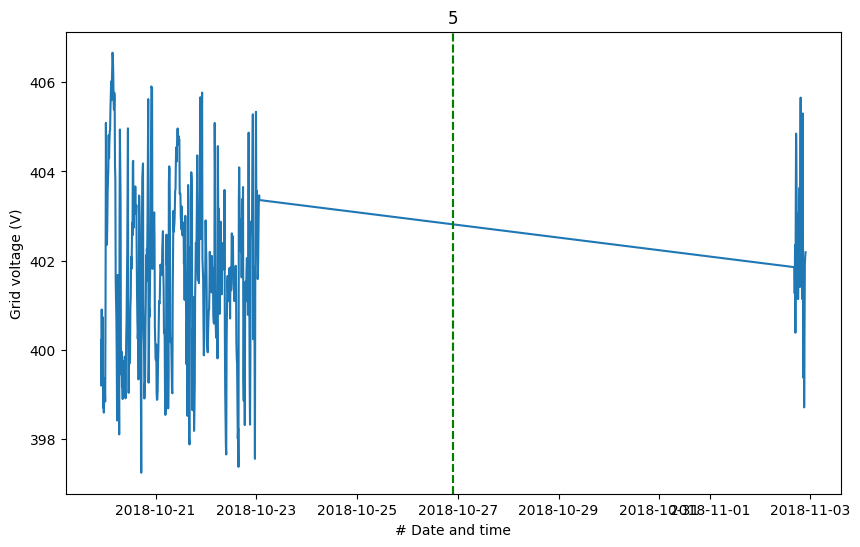

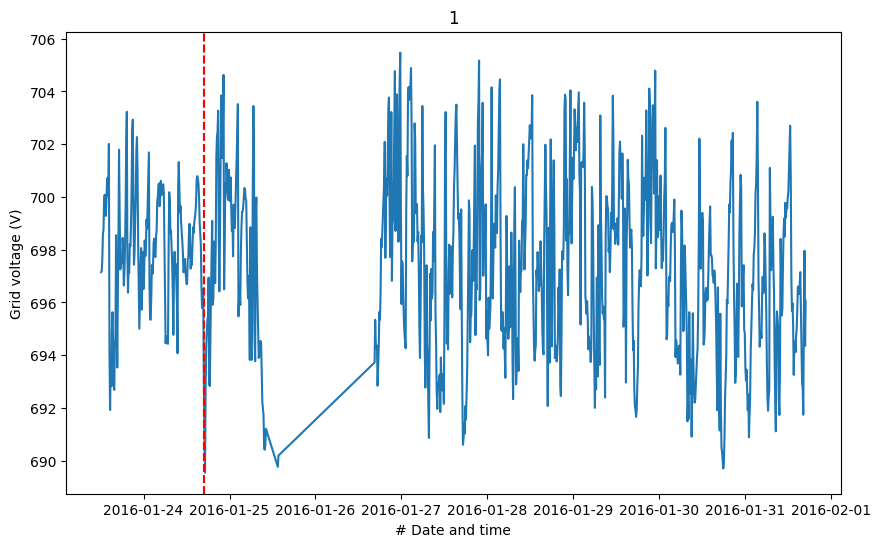

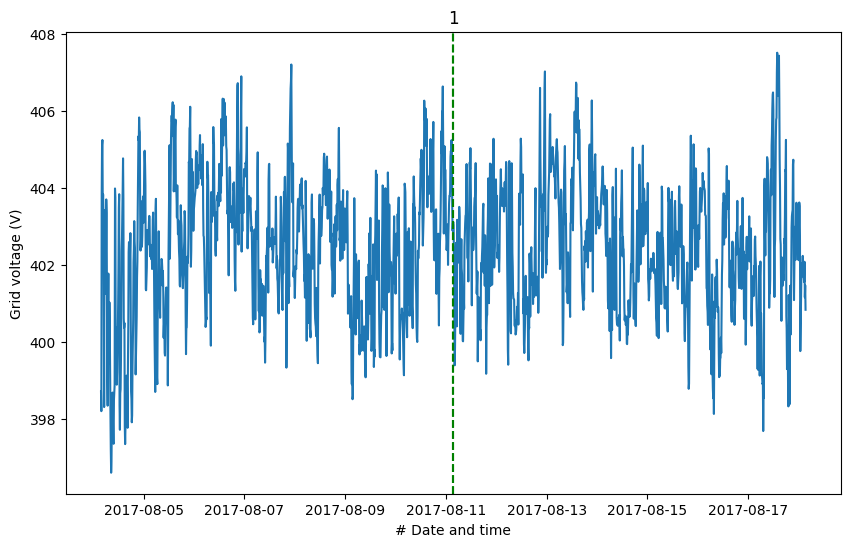

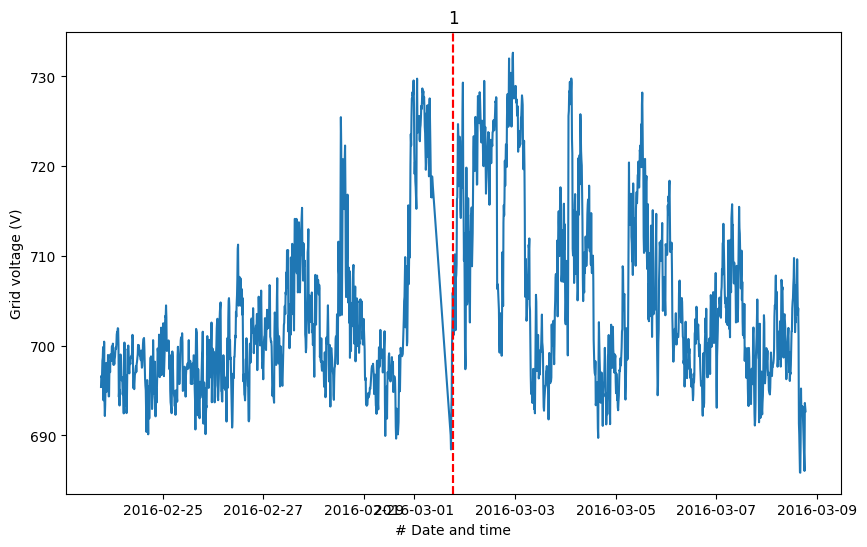

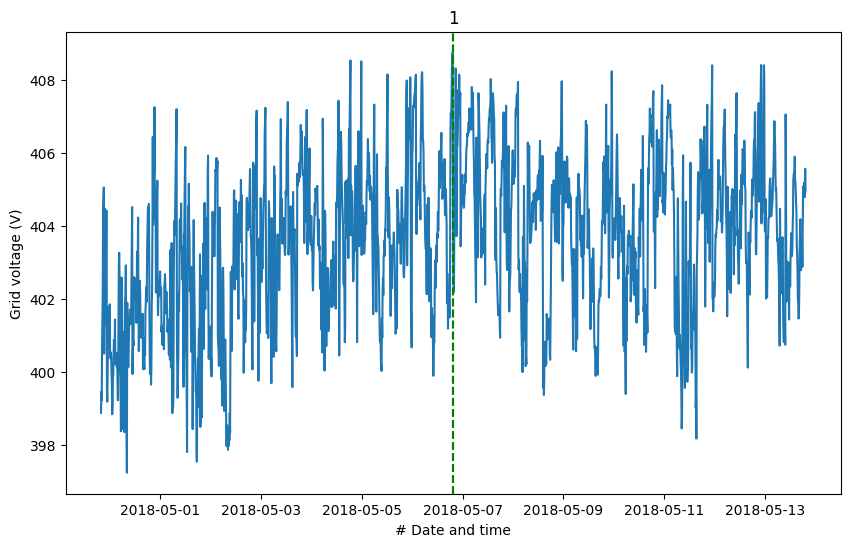

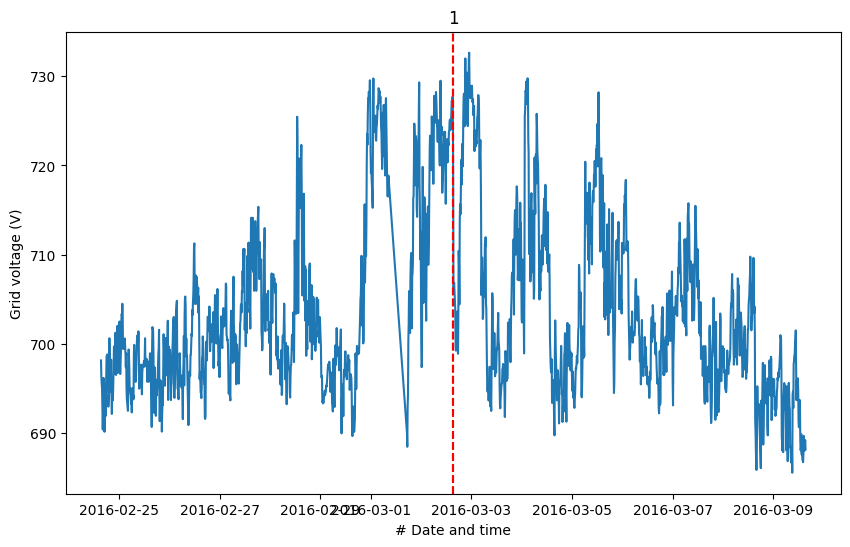

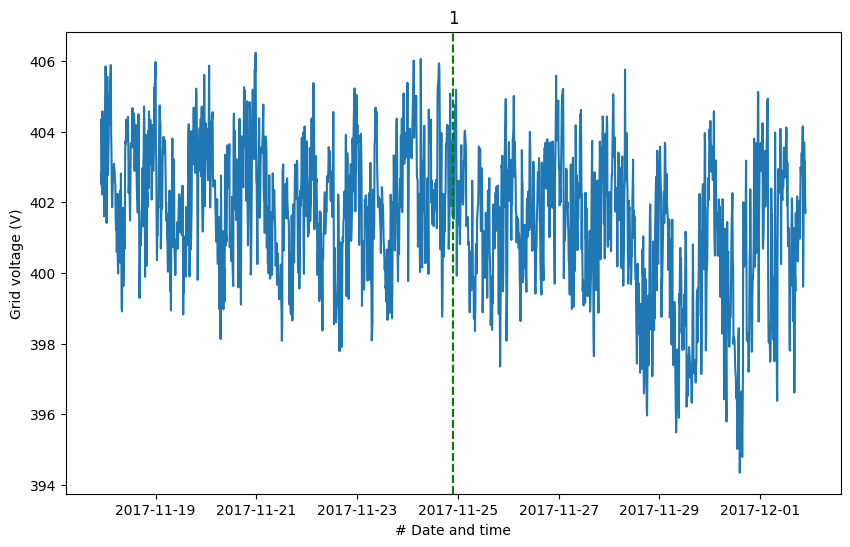

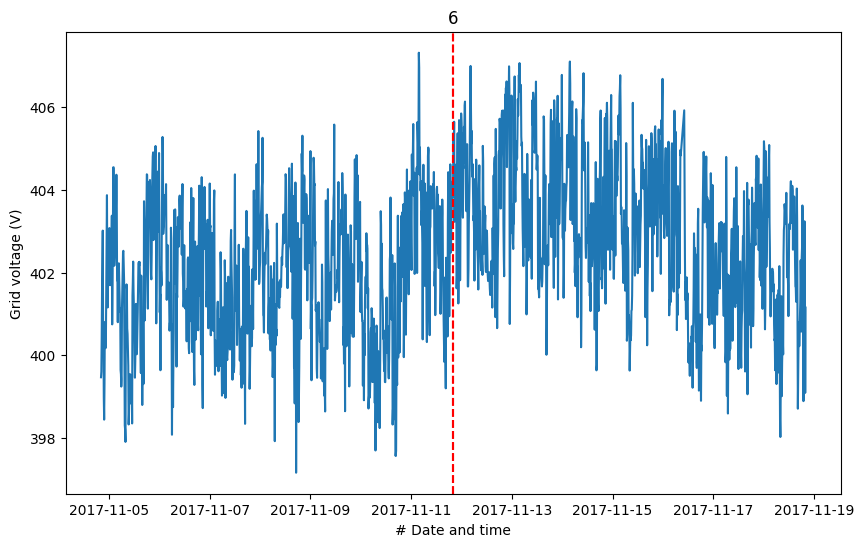

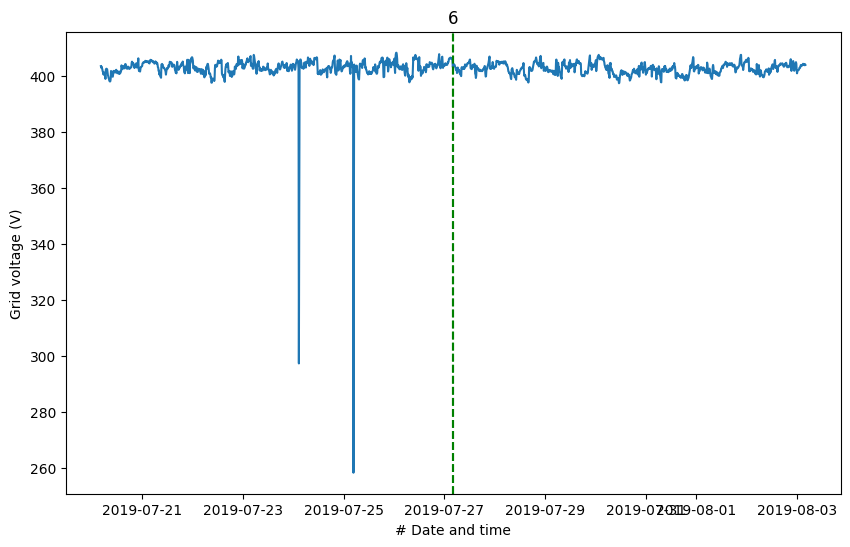

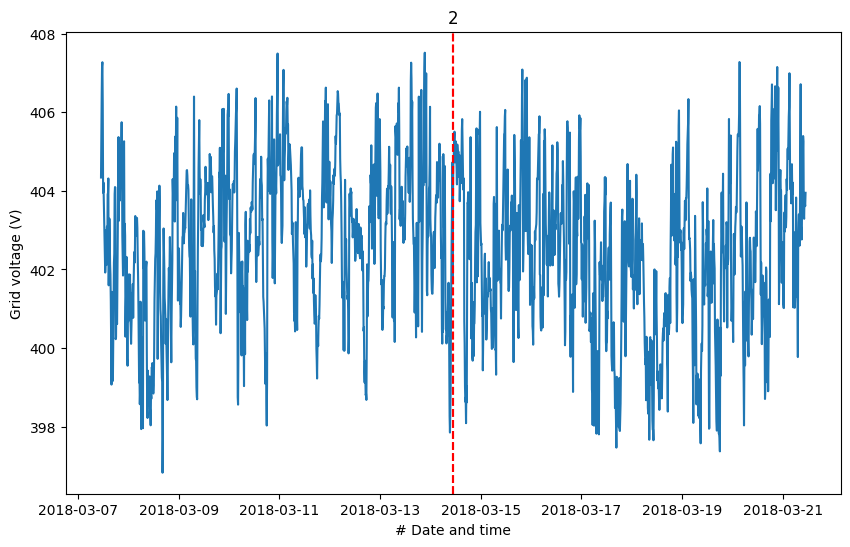

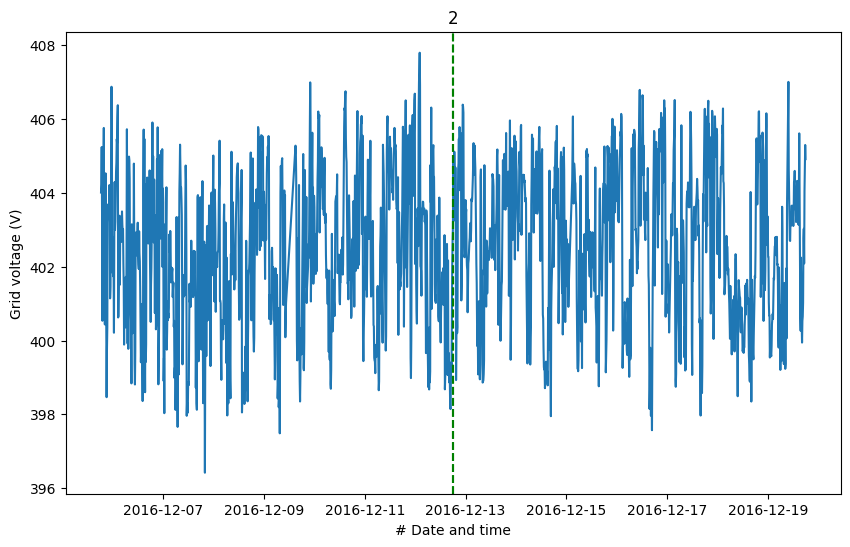

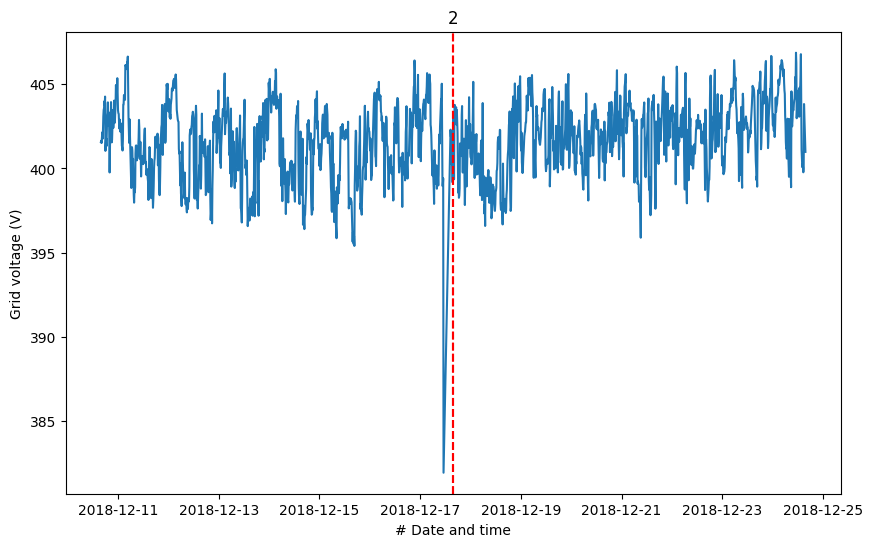

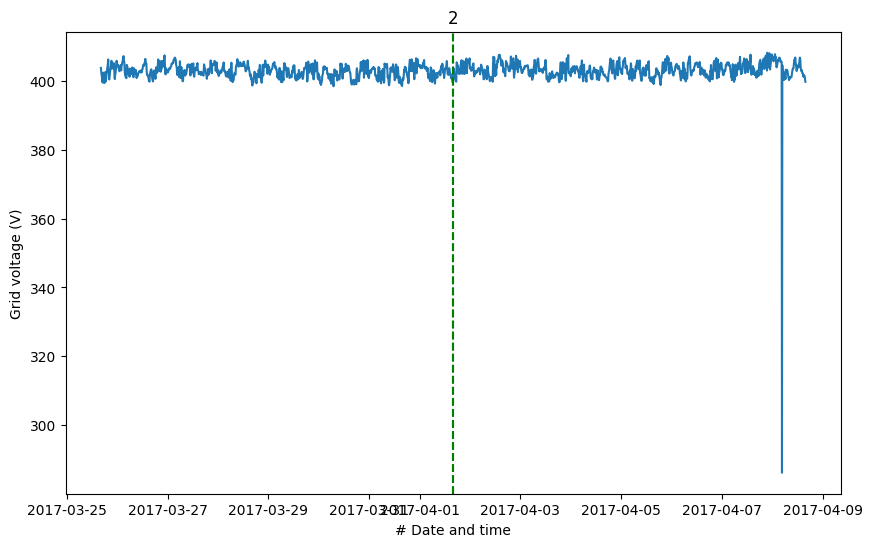

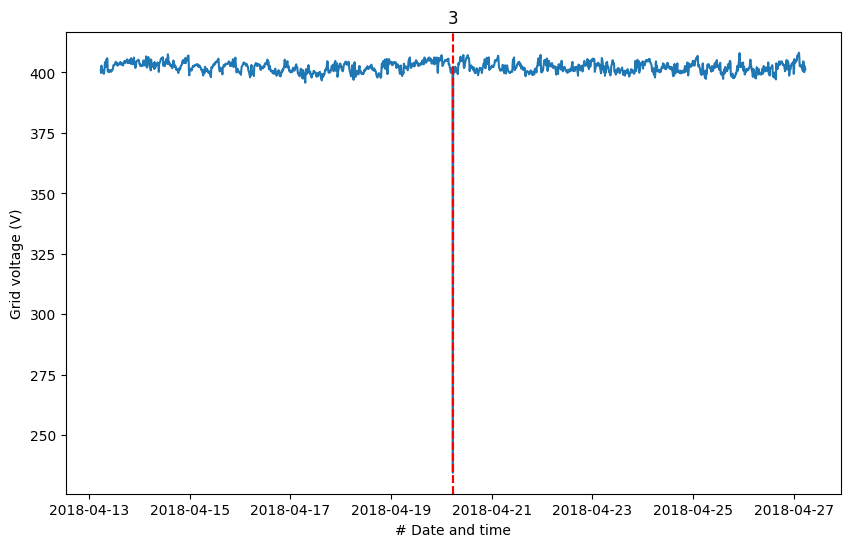

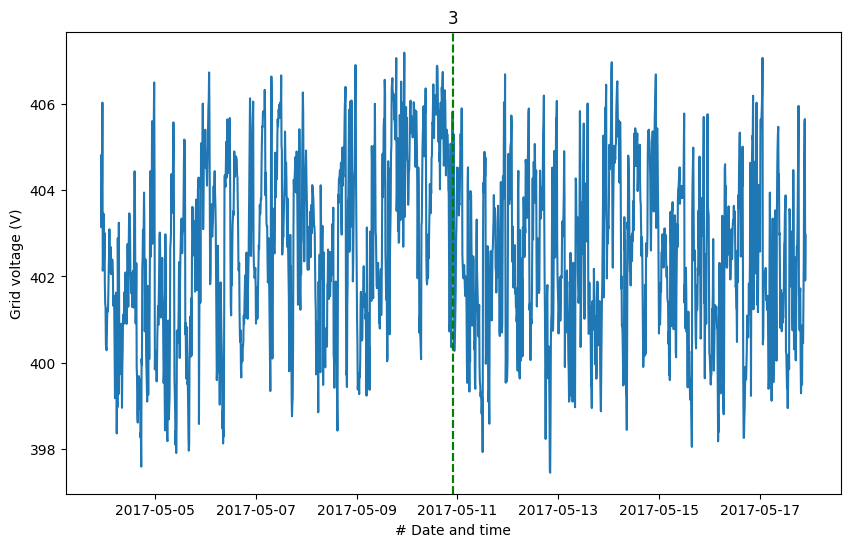

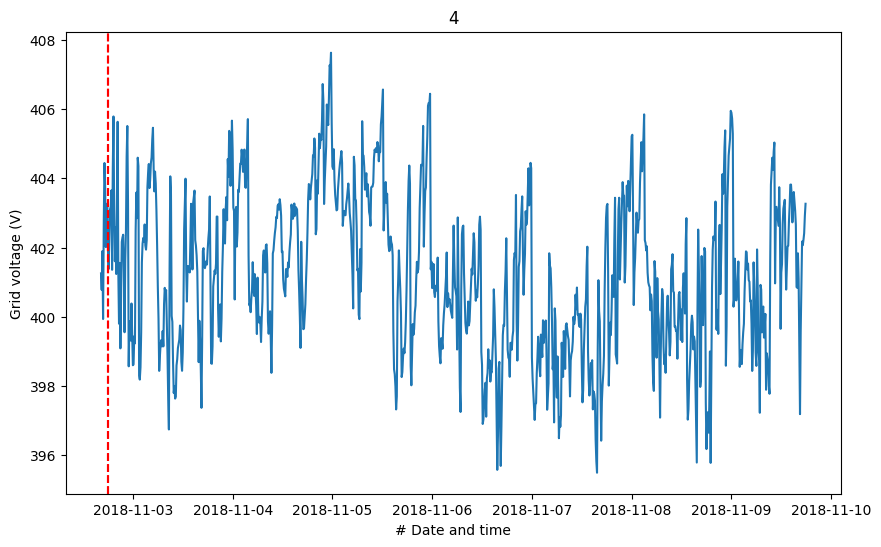

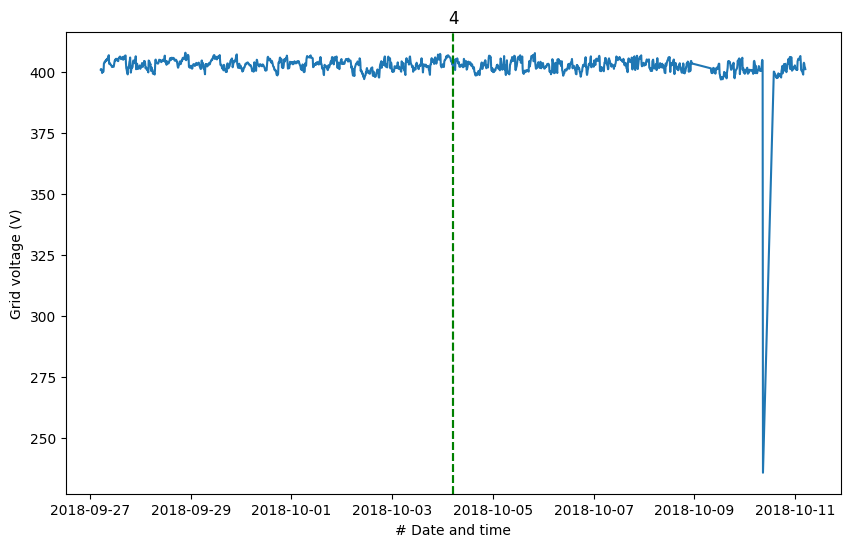

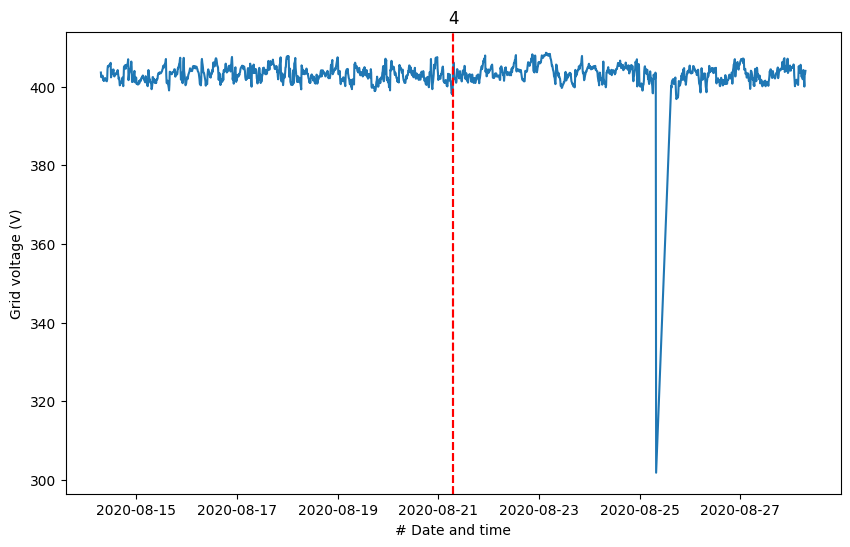

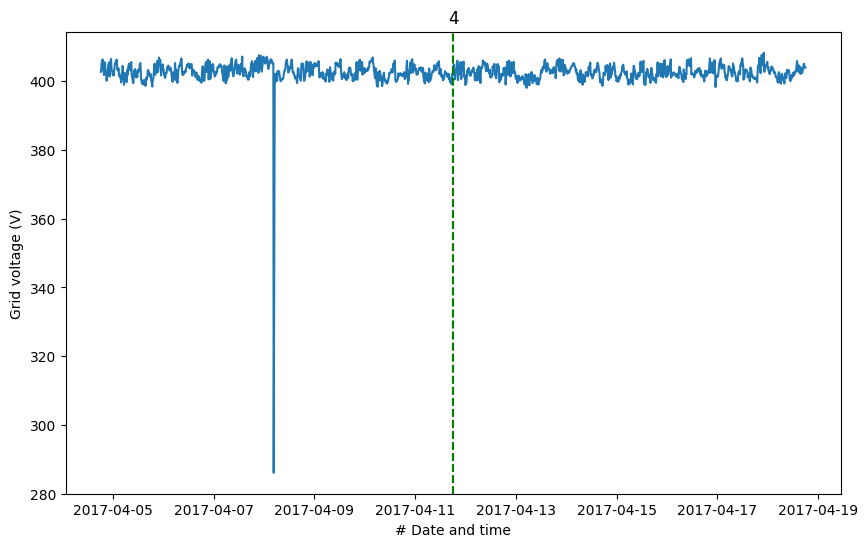

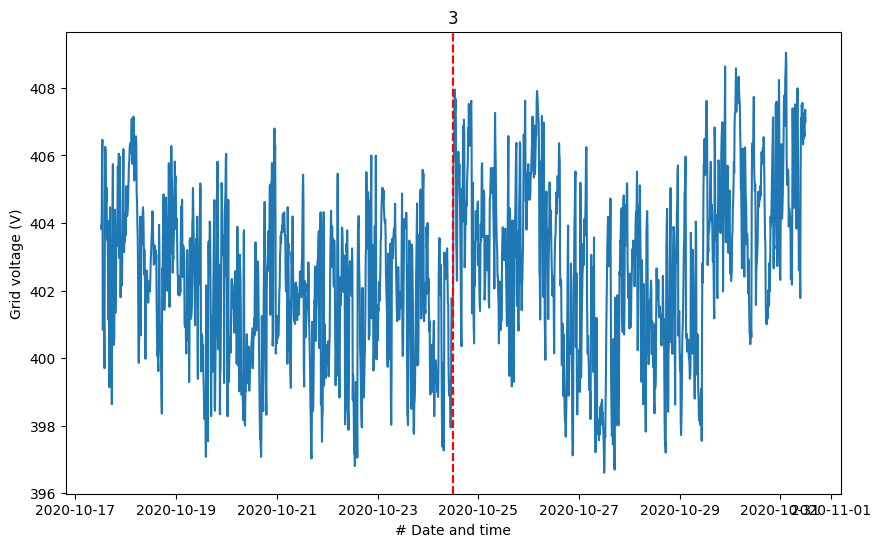

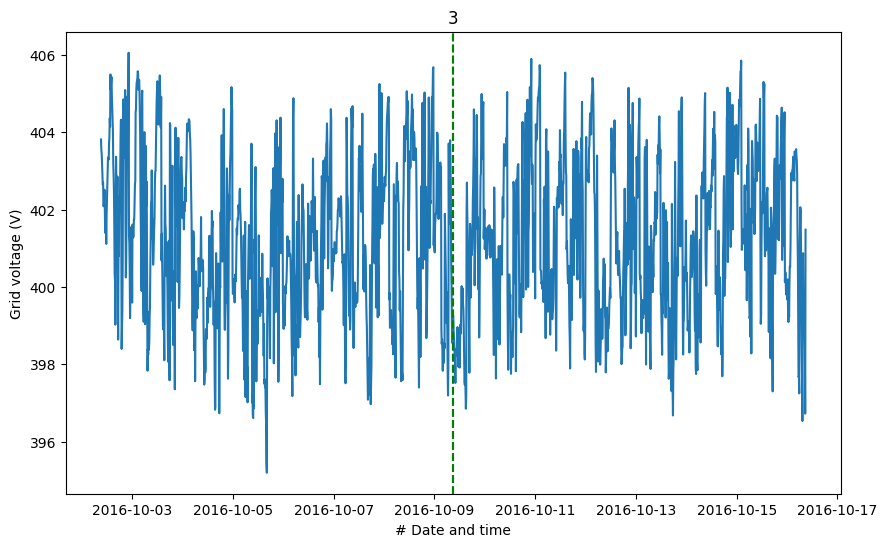

In [18]:

for fc_error in fc_errors.values:
    
    time_frequency_converter_error = fc_error[1]
    turbine = fc_error[2]

    time_frequency_converter_error_min = pd.to_datetime(time_frequency_converter_error) - pd.Timedelta(days=7)
    time_frequency_converter_error_max = pd.to_datetime(time_frequency_converter_error) + pd.Timedelta(days=7)

    turbine_df_filtered = turbine_df[turbine_df["# Date and time"]<time_frequency_converter_error_max]
    turbine_df_filtered = turbine_df_filtered[turbine_df_filtered["# Date and time"]>time_frequency_converter_error_min]
    turbine_df_filtered = turbine_df_filtered[turbine_df_filtered.Turbine==turbine]



    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.lineplot(x='# Date and time', y='Grid voltage (V)', data=turbine_df_filtered)
    plt.title(turbine)

    error_time = pd.to_datetime(time_frequency_converter_error)

    # Add a red vertical line at the specified date
    plt.axvline(x=error_time, color='red', linestyle='--') 

    
    # Add a red vertical line at the specified date
    plt.axvline(x=error_time, color='red', linestyle='--') 
    
    
    
    
    
    
    time_frequency_converter_error = random_datetime = select_random_time(turbine_df, "# Date and time")
    turbine = fc_error[2]

    time_frequency_converter_error_min = pd.to_datetime(time_frequency_converter_error) - pd.Timedelta(days=7)
    time_frequency_converter_error_max = pd.to_datetime(time_frequency_converter_error) + pd.Timedelta(days=7)

    turbine_df_filtered = turbine_df[turbine_df["# Date and time"]<time_frequency_converter_error_max]
    turbine_df_filtered = turbine_df_filtered[turbine_df_filtered["# Date and time"]>time_frequency_converter_error_min]
    turbine_df_filtered = turbine_df_filtered[turbine_df_filtered.Turbine==turbine]



    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.lineplot(x='# Date and time', y='Grid voltage (V)', data=turbine_df_filtered)
    plt.title(turbine)

    error_time = pd.to_datetime(time_frequency_converter_error)

    # Add a red vertical line at the specified date
    plt.axvline(x=error_time, color='green', linestyle='--') 
    
    # Add a red vertical line at the specified date
    plt.axvline(x=error_time, color='green', linestyle='--') 
    